In [1]:
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from pandas import DataFrame
import matplotlib.pyplot as plt
import dataset as ds
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
import seaborn as sns
import pandas as pd

def gmean():
  return make_scorer(geometric_mean_score)

df: DataFrame = ds.load()
X, y = df.values[:, :-1], df.values[:, -1]

param_grid = {
'clf__class_weight': ['balanced', None],
'clf__n_estimators': [10, 50, 100],
'clf__max_depth': [2, 5, 8],
'clf__min_samples_split': [1, 8, 16, 32, 64],
'clf__min_samples_leaf': [1, 8, 16, 32, 64],
}

pipeline = Pipeline([
('scaler', StandardScaler()),
('clf', RandomForestClassifier(random_state=42))
])

gcv = GridSearchCV(pipeline, param_grid, scoring=gmean(), cv=5, n_jobs=-1, verbose=1)

gcv.fit(X, y)

cv_results = pd.DataFrame(gcv.cv_results_)

# Select the parameters and score columns
subset = [
'param_clf__class_weight',
'param_clf__n_estimators',
'param_clf__max_depth',
'param_clf__min_samples_split',
'param_clf__min_samples_leaf',
'mean_test_score',
'std_test_score',
]

cv_results_sub = cv_results[subset]

cv_results_sub['params_combined'] = cv_results_sub[subset[:4]].apply(lambda row: '_'.join(row.values.astype(str)),
                                                                   axis=1)

cv_results_melted = cv_results_sub.melt(id_vars='params_combined', value_vars='mean_test_score', var_name='Metric',
                                      value_name='Score')

pivot = cv_results_melted.pivot(index='params_combined', columns='Metric', values='Score')

plt.figure(figsize=(10, 120))
sns.heatmap(pivot, annot=True, fmt=".3f", linewidths=.5, cmap='Blues')
plt.title('Wyniki')
plt.xlabel('G-mean')
plt.ylabel(f'Konfiguracja (class_weight, n_estimators, max_depth, min_samples_split, min_samples_leaf)')
plt.show()



Fitting 5 folds for each of 450 candidates, totalling 2250 fits


C:\Users\HououinKyouma\AppData\Local\Temp\ipykernel_4888\1236351441.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_results_sub['params_combined'] = cv_results_sub[subset[:4]].apply(lambda row: '_'.join(row.values.astype(str)),


ValueError: Index contains duplicate entries, cannot reshape

In [4]:
from copy import deepcopy
help = deepcopy(gcv.cv_results_)

In [10]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__class_weight,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.322843,0.011455,0.008702,0.003590,balanced,2,1,1,10,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.959679,0.965701,0.963623,0.933341,0.984693,0.961407,0.016470,168
1,1.255044,0.024838,0.014214,0.000612,balanced,2,1,1,50,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.957878,0.970652,0.962844,0.939663,0.981271,0.962462,0.013870,125
2,2.503555,0.080253,0.024091,0.001520,balanced,2,1,1,100,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.958650,0.969871,0.973581,0.945700,0.981271,0.965815,0.012423,76
3,0.293739,0.032555,0.006330,0.000726,balanced,2,1,8,10,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.959679,0.965701,0.963623,0.933341,0.984693,0.961407,0.016470,168
4,1.245893,0.022367,0.013752,0.000799,balanced,2,1,8,50,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.957878,0.970652,0.962844,0.939663,0.981271,0.962462,0.013870,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,3.945764,0.298309,0.018935,0.004635,None,8,64,32,50,"{'clf__class_weight': None, 'clf__max_depth': ...",0.888377,0.851464,0.955842,0.832238,0.921906,0.889965,0.045116,361
446,7.575568,0.160010,0.023217,0.003754,None,8,64,32,100,"{'clf__class_weight': None, 'clf__max_depth': ...",0.894464,0.857640,0.949495,0.832238,0.927951,0.892358,0.043257,355
447,0.774399,0.080803,0.006715,0.000508,None,8,64,64,10,"{'clf__class_weight': None, 'clf__max_depth': ...",0.882009,0.838054,0.943864,0.865145,0.933712,0.892557,0.040397,345
448,3.815613,0.133133,0.015230,0.002389,None,8,64,64,50,"{'clf__class_weight': None, 'clf__max_depth': ...",0.888377,0.851464,0.955842,0.832238,0.921906,0.889965,0.045116,361


C:\Users\HououinKyouma\AppData\Local\Temp\ipykernel_4888\4197341769.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_results_sub['params_combined'] = cv_results_sub[subset[:5]].apply(lambda row: '_'.join(row.values.astype(str)),


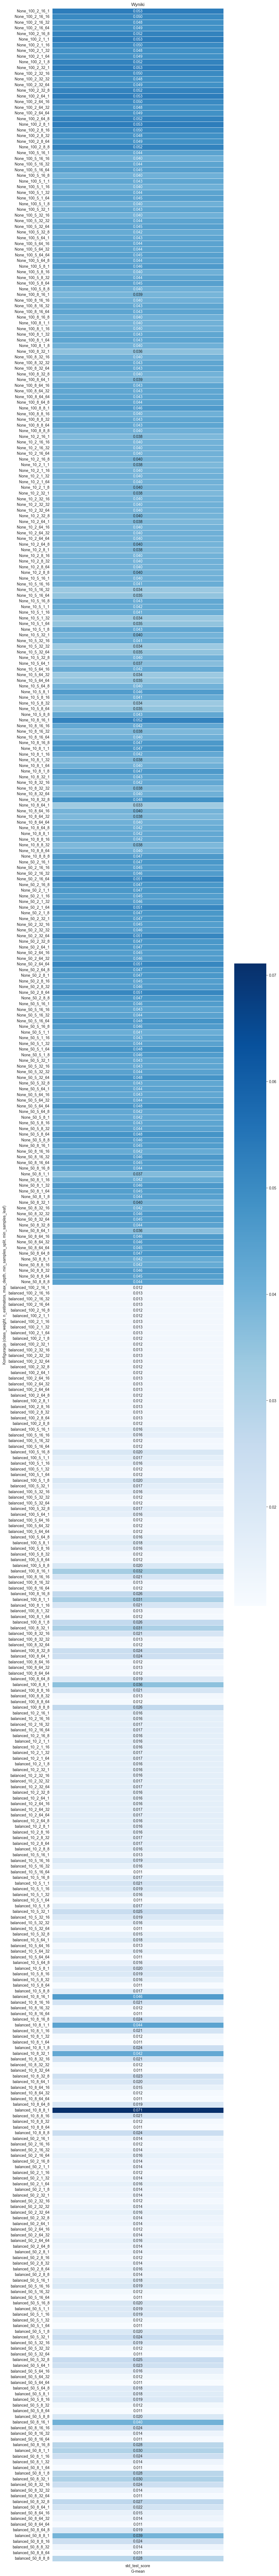

In [11]:

cv_results = pd.DataFrame(gcv.cv_results_)

# Select the parameters and score columns
subset = [
'param_clf__class_weight',
'param_clf__n_estimators',
'param_clf__max_depth',
'param_clf__min_samples_split',
'param_clf__min_samples_leaf',
'mean_test_score',
'std_test_score',
]

cv_results_sub = cv_results[subset]

cv_results_sub['params_combined'] = cv_results_sub[subset[:5]].apply(lambda row: '_'.join(row.values.astype(str)),
                                                                   axis=1)

cv_results_melted = cv_results_sub.melt(id_vars='params_combined', value_vars='std_test_score', var_name='Metric',
                                      value_name='Score')

pivot = cv_results_melted.pivot(index='params_combined', columns='Metric', values='Score')

plt.figure(figsize=(10, 120))
sns.heatmap(pivot, annot=True, fmt=".3f", linewidths=.5, cmap='Blues')
plt.title('Wyniki')
plt.xlabel('G-mean')
plt.ylabel(f'Konfiguracja (class_weight, n_estimators, max_depth, min_samples_split, min_samples_leaf)')
plt.show()
